# **Introducción a R para Análisis de Datos**
## Capítulo 4: Limpieza de Datos
--- 

**Autor:** Juan Martin Bellido  

**Descripción**  
En este capitulo aprenderemos a instrumentar las operaciones típicas de limpieza de datos. 

**¿Feedback? ¿comentarios?** Por favor compártelo conmigo escribiéndome por [LinkedIn](https://www.linkedin.com/in/jmartinbellido/)  

**Material Adicional**
* [Comandos Jupyter Notebook](https://datawizards.es/contenido/codigo-para-analisis-de-datos/guias/comandos-rapidos-jupyter)
* [Sintaxis Markdown](https://datawizards.es/contenido/codigo-para-analisis-de-datos/guias/sintaxis-markdown)


## INDICE
---
1. Valores nulos 
2. Valores duplicados
3. Outliers
4. Ejercicios


Convenciones utilizadas en este documento
> 👉 *Esto es una nota u observación*

> ⚠️ *Esto es una advertencia*

In [ ]:
# instalamos librería "data.table" porque Google colab no la incluye por defecto
install.packages("data.table")

In [ ]:
# importamos las librerías que utilizaremos
require(dplyr)
require(data.table)

In [3]:
# (opcional) editamos las opciones globales para evitar que R utilice notación científica
options(scipen=999)

# 1. Valores nulos
---


In [4]:
# importamos DataFrame
df_jamesbond = fread("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv")
glimpse(df_jamesbond)

Rows: 26
Columns: 7
$ Film                <chr> "Dr. No", "From Russia with Love", "Goldfinger", "…
$ Year                <int> 1962, 1963, 1964, 1965, 1967, 1967, 1969, 1971, 19…
$ Actor               <chr> "Sean Connery", "Sean Connery", "Sean Connery", "S…
$ Director            <chr> "Terence Young", "Terence Young", "Guy Hamilton", …
$ `Box Office`        <dbl> 448.8, 543.8, 820.4, 848.1, 315.0, 514.2, 291.5, 4…
$ Budget              <dbl> 7.0, 12.6, 18.6, 41.9, 85.0, 59.9, 37.3, 34.7, 30.…
$ `Bond Actor Salary` <dbl> 0.6, 1.6, 3.2, 4.7, NA, 4.4, 0.6, 5.8, NA, NA, NA,…


### Identificar valores nulos

La función `is.na()` determina si un elemento es un valor nulo (NA). Esta función se utiliza a menudo para detectar y manipular valores nulos en data frames y vectores.

In [ ]:
# la función is.na() comprueba valor a valor si se trata de un nulo (TRUE), en caso contrario (FALSE)
df_jamesbond$Film %>% is.na()

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE

In [ ]:
# podríamos sumar booleanos en un vector (o columna), estaríamos contando la cantidad de valores TRUE
df_jamesbond$Film %>% is.na() %>% sum()

[1] 0

In [ ]:
# para esta otra columna, encontramos que existen 8 valores nulos
df_jamesbond$`Bond Actor Salary` %>% is.na() %>% sum()

[1] 8

La función `apply()` permite aplicar una función a cada columna en un data frame.

In [ ]:
# la función apply() nos permite realizar una operación para todas las columnas (o filas) en un dataframe de forma automática
# por ejemplo, podríamos contar valores únicos para cada una de las columnas
apply(df_jamesbond, # seleccionamos dataframe
      2,            # 2 = indica que operamos según columnas (y no filas)
      n_distinct    # el nombre de la función
)

Film              Year             Actor          Director 
               25                24                 7                13 
       Box Office            Budget Bond Actor Salary 
               25                26                18

In [ ]:
# aplicamos la función apply() combinándola con el método anterior, para sumar la cantidad de nulos en cada columna
apply(is.na(df_jamesbond),2,sum)

Film              Year             Actor          Director 
                0                 0                 0                 0 
       Box Office            Budget Bond Actor Salary 
                0                 0                 8

In [ ]:
# hemos identificado que los nulos se encuentran en una única columna
# podríamos filtrar por filas con valores nulos para este campo
df_jamesbond %>% filter(
  is.na(`Bond Actor Salary`)
)

Film,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Casino Royale,1967,David Niven,Ken Hughes,315.0,85.0,NA
Live and Let Die,1973,Roger Moore,Guy Hamilton,460.3,30.8,NA
The Man with the Golden Gun,1974,Roger Moore,Guy Hamilton,334.0,27.7,NA
The Spy Who Loved Me,1977,Roger Moore,Lewis Gilbert,533.0,45.1,NA
Moonraker,1979,Roger Moore,Lewis Gilbert,535.0,91.5,NA
For Your Eyes Only,1981,Roger Moore,John Glen,449.4,60.2,NA
Never Say Never Again,1983,Sean Connery,Irvin Kershner,380.0,86.0,NA
Spectre,2015,Daniel Craig,Sam Mendes,726.7,206.3,NA


### Operar valores nulos

La función `complete.cases()` comprueba que las filas no contengan ningún valor nulo.


In [ ]:
# demostración de la función complete.cases()
complete.cases(df_jamesbond)

[1]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE
[13] FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[25]  TRUE FALSE

In [ ]:
# podría utilizar la función complete.cases() para filtrar únicamente por las filas completas en mi df
cond = complete.cases(df_jamesbond)
df_jamesbond[cond,]

Film,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6
From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6
Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2
Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7
You Only Live Twice,1967,Sean Connery,Lewis Gilbert,514.2,59.9,4.4
On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,291.5,37.3,0.6
Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,442.5,34.7,5.8
Octopussy,1983,Roger Moore,John Glen,373.8,53.9,7.8
A View to a Kill,1985,Roger Moore,John Glen,275.2,54.5,9.1


De forma alternativa, podríamos reemplazar valores nulos. La función `ifelse()` permite asignar valores según una prueba lógica.

In [ ]:
# reemplazamos los valores nulos en campo "Bond Actor Salary" por un 0
df_jamesbond$`Bond Actor Salary` = ifelse(is.na(df_jamesbond$`Bond Actor Salary`), 0, df_jamesbond$`Bond Actor Salary`)

El problema de reemplazar nulos por un valor arbitrario es que estamos alternado la distribución de la variable. A continución, repetiremos ejercicio, pero esta vez reemplazando nulos por el valor de la media para la distribución.

In [ ]:
# importamos DataFrame
df_jamesbond = fread("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv")
glimpse(df_jamesbond)

Rows: 26
Columns: 7
$ Film                <chr> "Dr. No", "From Russia with Love", "Goldfinger", "…
$ Year                <int> 1962, 1963, 1964, 1965, 1967, 1967, 1969, 1971, 19…
$ Actor               <chr> "Sean Connery", "Sean Connery", "Sean Connery", "S…
$ Director            <chr> "Terence Young", "Terence Young", "Guy Hamilton", …
$ `Box Office`        <dbl> 448.8, 543.8, 820.4, 848.1, 315.0, 514.2, 291.5, 4…
$ Budget              <dbl> 7.0, 12.6, 18.6, 41.9, 85.0, 59.9, 37.3, 34.7, 30.…
$ `Bond Actor Salary` <dbl> 0.6, 1.6, 3.2, 4.7, NA, 4.4, 0.6, 5.8, NA, NA, NA,…


In [ ]:
# reemplazamos valores nulos por valor medio
mean_salary = mean(df_jamesbond$`Bond Actor Salary`, na.rm = TRUE) # calculamos valor medio
df_jamesbond$`Bond Actor Salary` = ifelse(is.na(df_jamesbond$`Bond Actor Salary`), mean_salary, df_jamesbond$`Bond Actor Salary`)

# 2. Valores duplicados
---

In [ ]:
# importamos un DataFrame que contiene valores duplicados
df_duplicates = fread("https://data-wizards.s3.amazonaws.com/datasets/renfe_estaciones_duplicates.csv")
glimpse(df_duplicates)

Rows: 630
Columns: 9
$ CODIGO      <int> 1003, 1005, 1007, 1009, 2002, 2003, 3001, 3100, 3208, 3213…
$ DESCRIPCION <chr> "ARAHAL", "MARCHENA", "OSUNA", "PEDRERA", "PUENTE GENIL-HE…
$ LATITUD     <dbl> 37.26814, 37.33425, 37.23378, 37.22235, 37.35971, 37.07028…
$ LONGITUD    <dbl> -5.5484006, -5.4254295, -5.1148398, -4.8936960, -4.8221946…
$ DIRECCION   <chr> "CALLE VIRGEN DE LOS DOLORES. S/N", "AVENIDA MAESTRO SANTO…
$ C.P.        <int> 41600, 41620, 41640, 41566, 14500, 29540, 23620, 23007, 16…
$ POBLACION   <chr> "Arahal", "Marchena", "Osuna", "Pedrera", "Puente Genil", …
$ PROVINCIA   <chr> "Sevilla", "Sevilla", "Sevilla", "Sevilla", "Córdoba", "Má…
$ PAIS        <chr> "España", "España", "España", "España", "España", "España"…


In [ ]:
# consultamos cantidad de filas
nrow(df_duplicates)

[1] 630

La función `duplicated()` permite identificar las filas duplicadas.

In [ ]:
# demostración de la función duplicated()
duplicated(df_duplicates)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[217] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE
[229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[241] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[253] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[613] FALSE FALSE FALSE 

In [ ]:
# filtramos por las filas duplicadas
df_duplicates[duplicated(df_duplicates),]

CODIGO,DESCRIPCION,LATITUD,LONGITUD,DIRECCION,C.P.,POBLACION,PROVINCIA,PAIS
<int>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>
5000,GRANADA,37.18404,-3.609036,AVENIDA DE LOS ANDALUCES. S/N,18014,Granada,Granada,España
10204,ZARZALEJO,40.53882,-4.158073,CALLE DEL FERROCARRIL. S/N,28293,Zarzalejo,Madrid,España
11208,VITORIA/GASTEIZ,42.84153,-2.672665,PLAZUELA DE LA ESTACION. 1,1005,Vitoria-Gasteiz,Araba/Álava,España
11203,MANZANOS,42.74288,-2.867530,RIO ZADORRA KALEA. S/N,1220,Ribera Baja/Erribera Beitia,Araba/Álava,España
15006,CISNEROS,42.19107,-4.850206,CARRETERA P-932 - ESTACION FERROCARRIL. S/N,34320,Cisneros,Palencia,España
23004,PONTEVEDRA,42.42164,-8.635830,AVENIDA DE LA ESTACION. S/N,36003,Pontevedra,Pontevedra,España
31205,A GUDIÑA,42.06069,-7.132436,CARRETERA N-525 - BEATO SEBASTIAN APARICIO. S/N,32540,Gudiña. A,Ourense,España
34005,SAN PEDRO DEL ARROYO,40.80384,-4.871408,CALLE ESTACION FERROCARRIL. S/N,5350,San Pedro del Arroyo,Ávila,España
35206,NAVALMORAL DE LA MATA,39.89485,-5.545566,PLAZA ESTACION FERROCARRIL. 1,10300,Navalmoral de la Mata,Cáceres,España


In [ ]:
# consultamos cantidad de filas duplicadas
nrow(df_duplicates[duplicated(df_duplicates),])

[1] 10

La función `unique()` nos permite forzar valores únicos en filas.

In [ ]:
# forzamos valores unicos
unique(df_duplicates)

CODIGO,DESCRIPCION,LATITUD,LONGITUD,DIRECCION,C.P.,POBLACION,PROVINCIA,PAIS
<int>,<chr>,<dbl>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>
1003,ARAHAL,37.26814,-5.5484006,CALLE VIRGEN DE LOS DOLORES. S/N,41600,Arahal,Sevilla,España
1005,MARCHENA,37.33425,-5.4254295,AVENIDA MAESTRO SANTOS RUANO. 8,41620,Marchena,Sevilla,España
1007,OSUNA,37.23378,-5.1148398,AVENIDA ESTACION FERROCARRIL. S/N,41640,Osuna,Sevilla,España
1009,PEDRERA,37.22235,-4.8936960,CALLE MANUEL ARANDA. 3,41566,Pedrera,Sevilla,España
2002,PUENTE GENIL-HERRERA,37.35971,-4.8221946,CARRETERA A-318 - KM. 9 - ENTRE LOS PUEBLOS DE PUENTE GENIL (CËRDOBA) Y HERRERA (SEVILLA),14500,Puente Genil,Córdoba,España
2003,ANTEQUERA-SANTA ANA,37.07028,-4.7190304,CARRETERA MA-5406 - ESTACION FERROCARRIL. S/N,29540,Antequera,Málaga,España
3001,MENGIBAR-ARTICHUELA,37.97784,-3.8019294,CALLE CAMINO ESTACION FERROCARRIL. S/N,23620,Mengíbar,Jaén,España
3100,JAEN,37.78005,-3.7908847,PLAZA DE JAEN POR LA PAZ. 1,23007,Jaén,Jaén,España
3208,CUENCA FERNANDO ZOBEL,40.03528,-2.1441378,AVENIDA CERRO DE LA ESTRELLA. S/N - N-320 - CIRCUNVALACION DE CUENCA,16004,Cuenca,Cuenca,España


# 3. Outliers
---
Un *outlier* es un valor atípico o extremo en un conjunto de datos. Los *outliers* pueden ser resultado de errores de medición o de valores reales que se encuentran fuera de la distribución normal de los datos. Los *outliers* pueden afectar de manera negativa al análisis de datos, ya que pueden distorsionar la media y otras medidas de tendencia central. Por lo tanto, es importante detectar y tratar los *outliers* adecuadamente antes de realizar cualquier análisis.

Existen diferentes métodos para detectar *outliers*, ya que no existe una forma únivoca y objetiva de determinar cuál es el valor esperable para un conjunto de datos.




In [ ]:
# importamos DataFrame
df_jamesbond = fread("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv")
glimpse(df_jamesbond)

Rows: 26
Columns: 7
$ Film                <chr> "Dr. No", "From Russia with Love", "Goldfinger", "…
$ Year                <int> 1962, 1963, 1964, 1965, 1967, 1967, 1969, 1971, 19…
$ Actor               <chr> "Sean Connery", "Sean Connery", "Sean Connery", "S…
$ Director            <chr> "Terence Young", "Terence Young", "Guy Hamilton", …
$ `Box Office`        <dbl> 448.8, 543.8, 820.4, 848.1, 315.0, 514.2, 291.5, 4…
$ Budget              <dbl> 7.0, 12.6, 18.6, 41.9, 85.0, 59.9, 37.3, 34.7, 30.…
$ `Bond Actor Salary` <dbl> 0.6, 1.6, 3.2, 4.7, NA, 4.4, 0.6, 5.8, NA, NA, NA,…


### Método de distribución normal (normalizando a z)

El método de distribución normal (z) es una técnica estadística utilizada para determinar la probabilidad de que un valor dado se encuentre dentro de un rango determinado en una distribución normal.

Para utilizar el método de distribución normal (z), primero debemos conocer la media y la desviación estándar de la distribución. Luego, podemos utilizar la siguiente fórmula para calcular la probabilidad de que un valor dado se encuentre dentro de un rango determinado:

```
z = (valor - media) / desviación estándar
```

Por convención, se suele considerar que cualquier valor de z mayor a 3 (o menor a -3) es un outlier en una distribución normal. Esto se debe a que, en una distribución normal, la probabilidad de que un valor se encuentre a más de 3 desviaciones estándar de la media es muy baja (aprox. 0,3%). Por lo tanto, los valores que se encuentran a más de 3 desviaciones estándar de la media se consideran atípicos o extremos.

Sin embargo, es importante tener en cuenta que esta convención no es una regla absoluta y puede variar en función del contexto o el problema que estemos tratando.


In [ ]:
# calculamos la media y la desviación estándar
mean <- mean(df_jamesbond$`Box Office`)
sd <- sd(df_jamesbond$`Box Office`)

In [ ]:
# convertimos campo "box office" a z y lo almacenamos en una nueva columna
df_jamesbond$z_box_office = (df_jamesbond$`Box Office` - mean) / sd

In [ ]:
# visualizamos
df_jamesbond[1:10,c('Film','Box Office','z_box_office')]

Film,Box Office,z_box_office
<chr>,<dbl>,<dbl>
Dr. No,448.8,-0.2422284
From Russia with Love,543.8,0.2952832
Goldfinger,820.4,1.8602904
Thunderball,848.1,2.0170174
Casino Royale,315.0,-0.9992709
You Only Live Twice,514.2,0.1278059
On Her Majesty's Secret Service,291.5,-1.1322343
Diamonds Are Forever,442.5,-0.2778739
Live and Let Die,460.3,-0.1771612


In [ ]:
# ¿existe algún valor outlier a z = 3?
df_jamesbond %>% filter(
  abs(z_box_office) > 3 # la función abs() convierte a valor absoluto antes de testear condición
)
# nota: no tenemos ninguna observación que podría ser considerada outlier utilizando la convención (z=3)

Film,Year,Actor,Director,Box Office,Budget,Bond Actor Salary,z_box_office
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>


In [ ]:
# relajamos el límite a 2,5 desviaciones típicas
df_jamesbond %>% filter(
  abs(z_box_office) > 2.5
)
# nota: podemos encontrar una observación que sería considerada outlier

Film,Year,Actor,Director,Box Office,Budget,Bond Actor Salary,z_box_office
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Skyfall,2012,Daniel Craig,Sam Mendes,943.5,170.2,14.5,2.556792


### Método del rango intercuantílico

El método del rango intercuartilico es una técnica útil y robusta para detectar outliers en un conjunto de datos. A diferencia del método de distribución normal, el método del rango intercuartilico no asume ninguna distribución específica para el conjunto de datos. Esto hace que este método sea menos sensible a la presencia de valores extremos y más robusto ante la presencia de datos atípicos que el método de la distribución normal.

Para utilizar el método del rango intercuartilico para detectar outliers, podemos seguir los siguientes pasos:

1. Calcular el rango intercuartilico (IQR) de los datos utilizando la función "quantile()" de R.
2. Calcular los límites inferior y superior del rango intercuartilico utilizando la siguiente fórmula:
* Límite inferior = percentil 25 - 1.5 * IQR
* Límite superior = percentil 75 + 1.5 * IQR
3. Los valores que se encuentren por debajo del límite inferior o por encima del límite superior se consideran outliers.

El método del rango intercuartilico se puede visualizar de forma gráfica en un boxplot. Los outliers en un boxplot figuran como puntos por encima o debajo de los valores máximos. 

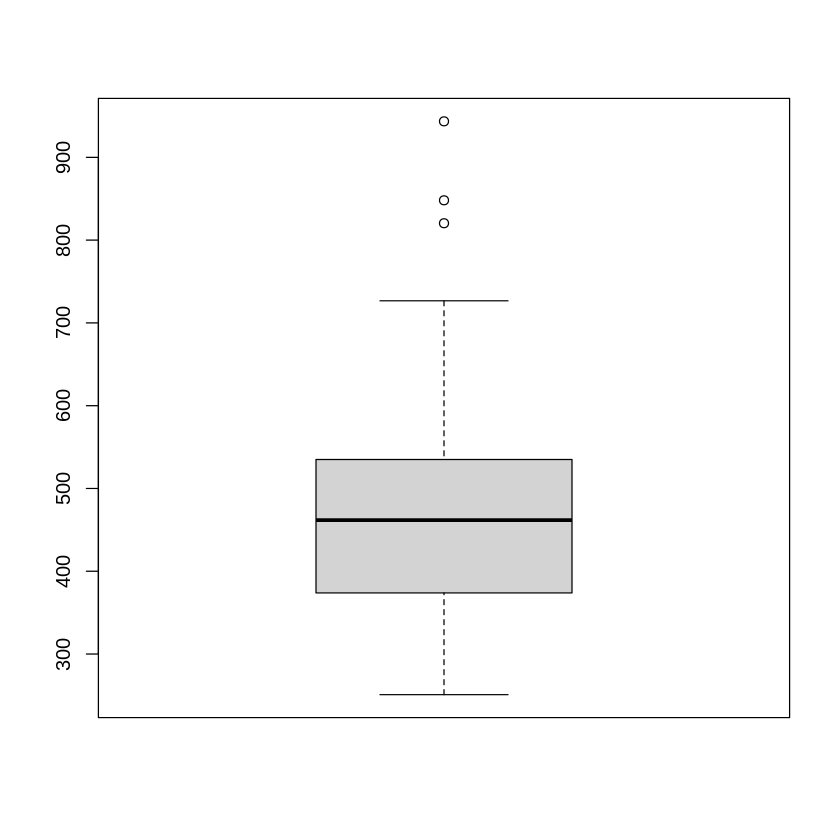

In [ ]:
# creamos un boxplot
boxplot(df_jamesbond$`Box Office`)

In [ ]:
# la funciín quantile() nos permite obtener el valor específico para una distribución
quantile(df_jamesbond$`Box Office`, 0.5)

50% 
461.75

In [ ]:
# calculamos el rango intercuartilico (IQR) como la diferencia entre el percentil 75 y el 25
IQR <- quantile(df_jamesbond$`Box Office`, 0.75) - quantile(df_jamesbond$`Box Office`, 0.25)

In [ ]:
# calculamos los límites inferior y superior
lower_limit <- quantile(df_jamesbond$`Box Office`, 0.25) - 1.5 * IQR
upper_limit <- quantile(df_jamesbond$`Box Office`, 0.75) + 1.5 * IQR

In [ ]:
# filtramos observaciones que se encuentren por fuera de estos límites
df_jamesbond %>% filter(
  `Box Office` < lower_limit | `Box Office` > upper_limit
)
# nota: hemos identificado las observaciones que se corresponden con puntos al graficar el boxplot

Film,Year,Actor,Director,Box Office,Budget,Bond Actor Salary,z_box_office
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2,1.860290
Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7,2.017017
Skyfall,2012,Daniel Craig,Sam Mendes,943.5,170.2,14.5,2.556792


# 5. Ejercicios
---
> 👉 Puedes encontrar las soluciones a los ejercicios [aquí](https://nbviewer.org/github/SomosDataWizards/R-Curso-Introductorio-Ejercicios/blob/main/Capitulo_4_Ejercicios.ipynb)

### Ejercicio #1

##### EX 1.A Identificar columnas con valores nulos (formalmente declarados) en el dataframe.
##### EX 1.B ¿Cuántas películas hay con valores nulos para el campo *director_name*?
##### EX 1.C Reemplazar valores nulos en *director_name* por "unknown".

> Dataset https://data-wizards.s3.amazonaws.com/datasets/movies.csv


In [ ]:
# importamos DataFrame
df_movies = fread("https://data-wizards.s3.amazonaws.com/datasets/movies.csv")
glimpse(df_movies)

Rows: 4,916
Columns: 28
$ color                     <chr> "Color", "Color", "Color", "Color", "", "Col…
$ director_name             <chr> "James Cameron", "Gore Verbinski", "Sam Mend…
$ num_critic_for_reviews    <int> 723, 302, 602, 813, NA, 462, 392, 324, 635, …
$ duration                  <int> 178, 169, 148, 164, NA, 132, 156, 100, 141, …
$ director_facebook_likes   <int> 0, 563, 0, 22000, 131, 475, 0, 15, 0, 282, 0…
$ actor_3_facebook_likes    <int> 855, 1000, 161, 23000, NA, 530, 4000, 284, 1…
$ actor_2_name              <chr> "Joel David Moore", "Orlando Bloom", "Rory K…
$ actor_1_facebook_likes    <int> 1000, 40000, 11000, 27000, 131, 640, 24000, …
$ gross                     <dbl> 760505847, 309404152, 200074175, 448130642, …
$ genres                    <chr> "Action|Adventure|Fantasy|Sci-Fi", "Action|A…
$ actor_1_name              <chr> "CCH Pounder", "Johnny Depp", "Christoph Wal…
$ movie_title               <chr> "Avatar", "Pirates of the Caribbean: At Worl…
$ num_voted_user

### Ejercicio #2

Detectar empresas que sean outliers en cantidad de empleados.

##### EX 2.A Utilizando distribución normal
##### EX 2.B Utilizando el método del rango intercuartílico

> Dataset https://data-wizards.s3.amazonaws.com/datasets/fortune1000.csv

In [ ]:
# importamos DataFrame
df_fortune = fread("https://data-wizards.s3.amazonaws.com/datasets/fortune1000.csv")
glimpse(df_fortune)

Rows: 1,000
Columns: 8
$ Rank      <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1…
$ Company   <chr> "Walmart", "Exxon Mobil", "Apple", "Berkshire Hathaway", "Mc…
$ Sector    <chr> "Retailing", "Energy", "Technology", "Financials", "Health C…
$ Industry  <chr> "General Merchandisers", "Petroleum Refining", "Computers, O…
$ Location  <chr> "Bentonville, AR", "Irving, TX", "Cupertino, CA", "Omaha, NE…
$ Revenue   <int> 482130, 246204, 233715, 210821, 181241, 157107, 153290, 1523…
$ Profits   <int> 14694, 16150, 53394, 24083, 1476, 5813, 5237, 9687, 7373, 13…
$ Employees <int> 2300000, 75600, 110000, 331000, 70400, 200000, 199000, 21500…
